# Predicting Car Prices With Machine Learning Algorithms

# Introduction

In this machine learning project, I aimed to ***predict car prices*** in the market based on various features and characteristics of the cars. The project follows a **typical machine learning pipeline**, including ***data loading, data preprocessing, feature engineering, model selection, model evaluation, and comparison of different models***. My outputs will be based on a regression model. Initially, I will implement a linear regression model, I will also implement a secondary model ***Random Forest Regressor*** for model comparison. I will select a ***champion model*** between these two models. At the end of the project, I will provide a ***comprehensive report*** summarizing the entire study.


## Preparation and Exploration of the Data

The dataset used in this project relies on the data from a kaggle resource. It includes a variety of features related to 65 different car models.

You can find the data frame from the link below:

https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/code

---


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import datetime as dt
import hvplot.pandas
import re
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
# Reading the data from the csv file as df

df = pd.read_csv("car_price_prediction.csv")

In [4]:
# Keeping the copy of the original df to be used in special processes

df_copy = df.copy()

In [5]:
# I have 19237 columns and 18 rows totally in the data frame

df.shape

(19237, 18)

In [6]:
# Observing columns of the first 3 rows

df.head(3).T

,0,1,2
ID,45654403,44731507,45774419
Price,13328,16621,8467
Levy,1399,1018,-
Manufacturer,LEXUS,CHEVROLET,HONDA
Model,RX 450,Equinox,FIT
Prod. year,2010,2011,2006
Category,Jeep,Jeep,Hatchback
Leather interior,Yes,No,No
Fuel type,Hybrid,Petrol,Petrol
Engine volume,3.5,3,1.3


In [7]:
# Observing columns of the last 3 rows

df.tail(3).T

,19234,19235,19236
ID,45804997,45793526,45813273
Price,26108,5331,470
Levy,836,1288,753
Manufacturer,HYUNDAI,CHEVROLET,HYUNDAI
Model,Tucson,Captiva,Sonata
Prod. year,2010,2007,2012
Category,Jeep,Jeep,Sedan
Leather interior,Yes,Yes,Yes
Fuel type,Diesel,Diesel,Hybrid
Engine volume,2,2,2.4


In [8]:
# Observing columns of the sample 3 rows

df.sample(3).T

,9736,15053,5419
ID,45730760,45797071,45618047
Price,47377,10349,68994
Levy,879,836,1493
Manufacturer,HYUNDAI,HYUNDAI,MERCEDES-BENZ
Model,Elantra,Genesis,GLE 350
Prod. year,2019,2010,2016
Category,Sedan,Coupe,Jeep
Leather interior,Yes,Yes,Yes
Fuel type,Petrol,Petrol,Petrol
Engine volume,1.6,2,3.5


### I see that 5 of all the features are numeric and 13 of them have non-numeric data type.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [10]:
# Calculating the statistics for each column

df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,19237.00,19237.00,19237.00,19237.00,19237.00
mean,45576535.89,18555.93,2010.91,4.58,6.58
std,936591.42,190581.27,5.67,1.20,4.32
min,20746880.00,1.00,1939.00,1.00,0.00
25%,45698374.00,5331.00,2009.00,4.00,4.00
50%,45772308.00,13172.00,2012.00,4.00,6.00
75%,45802036.00,22075.00,2015.00,4.00,12.00
max,45816654.00,26307500.00,2020.00,16.00,16.00


In [11]:
# Observing the summary statistics for the object features

df.describe(include=[object]).T

,count,unique,top,freq
Levy,19237,559,-,5819
Manufacturer,19237,65,HYUNDAI,3769
Model,19237,1590,Prius,1083
Category,19237,11,Sedan,8736
Leather interior,19237,2,Yes,13954
Fuel type,19237,7,Petrol,10150
Engine volume,19237,107,2,3916
Mileage,19237,7687,0 km,721
Gear box type,19237,4,Automatic,13514
Drive wheels,19237,3,Front,12874


In [12]:
# Observing all the columns in the data frame

df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

### I improve column names to be used in a standard way for further processes.

In [13]:
df.rename(columns={"Prod. year": "Prod_year",
                   "Manufacturer":"Make",
                   "Leather interior":"Leather_interior",
                   "Fuel type":"Fuel_type",
                   "Mileage":"Mileage_km",
                   "Engine volume":"Engine_volume",
                   "Gear box type":"Gearbox_type",
                   "Drive wheels":"Drive_wheels"}, inplace=True)

df.head(3)

,ID,Price,Levy,Make,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.00,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.00,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.00,Variator,Front,04-May,Right-hand drive,Black,2


In [14]:
df.columns

Index(['ID', 'Price', 'Levy', 'Make', 'Model', 'Prod_year', 'Category',
       'Leather_interior', 'Fuel_type', 'Engine_volume', 'Mileage_km',
       'Cylinders', 'Gearbox_type', 'Drive_wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [15]:
# Initially I have 65 brands of cars in the dataframe.

print('Num. of Brands: ', len(df['Make'].unique()))

df['Make'].unique()

Num. of Brands:  65


array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [16]:
# There are car brands which has quite less frequency in the dataset.

df[df['Make'] == 'სხვა']

,ID,Price,Levy,Make,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags
2358,45779593,25089,-,სხვა,IVECO DAYLY,2007,Microbus,No,Diesel,2.3 Turbo,328000 km,4.00,Manual,Rear,04-May,Left wheel,White,1
4792,39223518,9408,-,სხვა,GONOW,2005,Jeep,Yes,Petrol,2.3,102000 km,4.00,Manual,Rear,04-May,Left wheel,Silver,2


In [17]:
df[df['Make'] == 'ZAZ']

,ID,Price,Levy,Make,Model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags
5222,45760001,2000,-,ZAZ,969 968m,1989,Coupe,No,Petrol,0.8,201000 km,3.00,Manual,Front,02-Mar,Left wheel,Blue,0
14990,45791835,5645,-,ZAZ,969 luaz,1990,Jeep,Yes,Petrol,0.9,64525 km,4.00,Manual,4x4,02-Mar,Left wheel,Green,0


In [18]:
# There are 65 Brands of cars most of which have less than 50 occurences.

make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Occurrence']
make_counts = make_counts.sort_values(by='Occurrence', ascending=False)
make_counts

,Make,Occurrence
0,HYUNDAI,3769
1,TOYOTA,3662
2,MERCEDES-BENZ,2076
3,FORD,1111
4,CHEVROLET,1069
5,BMW,1049
6,LEXUS,982
7,HONDA,977
8,NISSAN,660
9,VOLKSWAGEN,579


In [19]:
# Check the rows and columns

df.shape

(19237, 18)

### ✂️ In the dataset, we observe a wide range of car brands, with some brands having very limited occurrences.
While diversity in data is beneficial for training the model,
having extremely rare occurrences of certain car brands might cause noise and decrease the model's ability to generalize effectively.
That's why by eliminating car brands which have less than 50 occurences, I obtain a cleaner dataframe.
This will also help me avoid overfitting because brands with very low occurrences might not have enough data for the model to learn meaningful patterns and may lead to overfitting.

In [20]:
threshold = 50
make_counts = df['Make'].value_counts()
valid_makes = make_counts[make_counts > threshold].index
df_filtered = df[df['Make'].isin(valid_makes)]
df = df_filtered

df.shape


(18723, 18)

In [21]:
# Now, we have 23 car Makes which have at least 54 cars.

make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Occurrence']
make_counts = make_counts.sort_values(by='Occurrence', ascending=False)
make_counts

,Make,Occurrence
0,HYUNDAI,3769
1,TOYOTA,3662
2,MERCEDES-BENZ,2076
3,FORD,1111
4,CHEVROLET,1069
5,BMW,1049
6,LEXUS,982
7,HONDA,977
8,NISSAN,660
9,VOLKSWAGEN,579


In [22]:
# We can combine Make & Model columns to avoid any possible model conflictions among different car producers.

df['Make_model'] = df['Make'] + ' ' + df['Model']
df.drop(['Model'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18723 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18723 non-null  int64  
 1   Price             18723 non-null  int64  
 2   Levy              18723 non-null  object 
 3   Make              18723 non-null  object 
 4   Prod_year         18723 non-null  int64  
 5   Category          18723 non-null  object 
 6   Leather_interior  18723 non-null  object 
 7   Fuel_type         18723 non-null  object 
 8   Engine_volume     18723 non-null  object 
 9   Mileage_km        18723 non-null  object 
 10  Cylinders         18723 non-null  float64
 11  Gearbox_type      18723 non-null  object 
 12  Drive_wheels      18723 non-null  object 
 13  Doors             18723 non-null  object 
 14  Wheel             18723 non-null  object 
 15  Color             18723 non-null  object 
 16  Airbags           18723 non-null  int64  
 17

### I have to deal with the Engine_volume and Doors features. Engine_volume contains string values like "Turbo".
### And the Doors feature seems spoiled by an excel sheet conversion of numeric values to date type like "04-May"

In [23]:
df['Engine_volume'] = df['Engine_volume'].apply(lambda x: re.findall(r'\d+\.\d+|\d+', str(x))[0] if re.findall(r'\d+\.\d+|\d+', str(x)) else np.nan)
df['Doors'] = df['Doors'].apply(lambda x: re.findall(r'\d+', str(x))[0] if re.findall(r'\d+', str(x)) else np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18723 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18723 non-null  int64  
 1   Price             18723 non-null  int64  
 2   Levy              18723 non-null  object 
 3   Make              18723 non-null  object 
 4   Prod_year         18723 non-null  int64  
 5   Category          18723 non-null  object 
 6   Leather_interior  18723 non-null  object 
 7   Fuel_type         18723 non-null  object 
 8   Engine_volume     18723 non-null  object 
 9   Mileage_km        18723 non-null  object 
 10  Cylinders         18723 non-null  float64
 11  Gearbox_type      18723 non-null  object 
 12  Drive_wheels      18723 non-null  object 
 13  Doors             18723 non-null  object 
 14  Wheel             18723 non-null  object 
 15  Color             18723 non-null  object 
 16  Airbags           18723 non-null  int64  
 17

In [24]:
# After cleaning 'Engine_volume' and 'Doors' features, I can convert the features below from object data type to numeric data type.

df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Engine_volume'] = pd.to_numeric(df['Engine_volume'], errors='coerce')
df['Mileage_km'] = df['Mileage_km'].str.replace(' km', '').str.replace(',', '')
df['Mileage_km'] = pd.to_numeric(df['Mileage_km'], errors='coerce')
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18723 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18723 non-null  int64  
 1   Price             18723 non-null  int64  
 2   Levy              13221 non-null  float64
 3   Make              18723 non-null  object 
 4   Prod_year         18723 non-null  int64  
 5   Category          18723 non-null  object 
 6   Leather_interior  18723 non-null  object 
 7   Fuel_type         18723 non-null  object 
 8   Engine_volume     18723 non-null  float64
 9   Mileage_km        18723 non-null  int64  
 10  Cylinders         18723 non-null  float64
 11  Gearbox_type      18723 non-null  object 
 12  Drive_wheels      18723 non-null  object 
 13  Doors             18723 non-null  int64  
 14  Wheel             18723 non-null  object 
 15  Color             18723 non-null  object 
 16  Airbags           18723 non-null  int64  
 17

In [25]:
# Taking a look at the first 3 rows of the data frame

df.head(3)

,ID,Price,Levy,Make,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags,Make_model
0,45654403,13328,1399.00,LEXUS,2010,Jeep,Yes,Hybrid,3.50,186005,6.00,Automatic,4x4,4,Left wheel,Silver,12,LEXUS RX 450
1,44731507,16621,1018.00,CHEVROLET,2011,Jeep,No,Petrol,3.00,192000,6.00,Tiptronic,4x4,4,Left wheel,Black,8,CHEVROLET Equinox
2,45774419,8467,NaN,HONDA,2006,Hatchback,No,Petrol,1.30,200000,4.00,Variator,Front,4,Right-hand drive,Black,2,HONDA FIT


In [26]:
# I have 18723 rows and 18 columns

df.shape

(18723, 18)

In [27]:
# I have missing values in the Levy feature. I will deal with it later on in the feature engineering process below.

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])
isnull

,isnull
ID,0
Price,0
Levy,5502
Make,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0
Mileage_km,0


## I will examine and clean all the columns/features one by one

### Evaluation of "ID" column

In [28]:
# It seems that there are some repetitive rows with the same ID number.

df.ID.value_counts(dropna=False)

ID
45815361    8
45815365    8
45815368    7
45815363    7
45723475    7
           ..
45644686    1
45660756    1
45815826    1
45797426    1
45813273    1
Name: count, Length: 18418, dtype: int64

In [29]:
# I check and verify that same ID's have completely repetitive rows.

target_id = 45815365

target_rows = df[df['ID'] == target_id]

target_rows

,ID,Price,Levy,Make,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags,Make_model
2767,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
7444,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
9779,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
9847,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
12389,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
15052,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
16529,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli
17285,45815365,7213,NaN,MAZDA,2003,Hatchback,No,CNG,1.40,185000,4.00,Manual,Front,4,Left wheel,Blue,4,MAZDA Demio evropuli


In [30]:
df[df.duplicated(keep=False)].sort_values(by="ID")

,ID,Price,Levy,Make,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags,Make_model
7269,35464629,7840,1111.00,HONDA,2012,Hatchback,No,Petrol,1.30,108000,4.00,Automatic,Front,4,Right-hand drive,Blue,6,HONDA FIT
5754,35464629,7840,1111.00,HONDA,2012,Hatchback,No,Petrol,1.30,108000,4.00,Automatic,Front,4,Right-hand drive,Blue,6,HONDA FIT
6732,36559154,19726,NaN,MERCEDES-BENZ,2002,Goods wagon,No,Diesel,2.20,280000,4.00,Manual,Rear,2,Left wheel,White,2,MERCEDES-BENZ Sprinter 411
1107,36559154,19726,NaN,MERCEDES-BENZ,2002,Goods wagon,No,Diesel,2.20,280000,4.00,Manual,Rear,2,Left wheel,White,2,MERCEDES-BENZ Sprinter 411
9990,41770767,11917,NaN,NISSAN,2004,Jeep,Yes,CNG,3.50,233600,6.00,Variator,4x4,4,Left wheel,Silver,6,NISSAN Murano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,45815564,9408,NaN,MERCEDES-BENZ,2000,Sedan,No,Petrol,2.40,252000,6.00,Manual,Rear,4,Left wheel,Black,4,MERCEDES-BENZ E 240
14469,45815994,4077,751.00,HYUNDAI,2013,Sedan,Yes,Petrol,2.40,111930,4.00,Automatic,Front,4,Left wheel,Silver,12,HYUNDAI Sonata
3756,45815994,4077,751.00,HYUNDAI,2013,Sedan,Yes,Petrol,2.40,111930,4.00,Automatic,Front,4,Left wheel,Silver,12,HYUNDAI Sonata
8730,45816384,49237,730.00,HYUNDAI,2016,Jeep,Yes,Petrol,1.60,27000,4.00,Tiptronic,4x4,4,Left wheel,White,12,HYUNDAI Tucson


In [31]:
# I drop duplicated rows based on repeated 'ID's
df = df.drop_duplicates(subset='ID', keep='first')

df['ID'].value_counts(dropna=False)


ID
45654403    1
45624811    1
45775377    1
45646281    1
45629900    1
           ..
45786951    1
45805867    1
45763375    1
45128746    1
45813273    1
Name: count, Length: 18418, dtype: int64

In [32]:
# I don't need the ID column anymore

df = df.drop('ID', axis=1)

In [33]:
# I have 18418 rows and 18 columns

df.shape

(18418, 17)

### Evaluation of "Levy" column.

*According to a research on internet I understand that Levy is a tax related term. It is the tax values of the cars. And also the Levy feature is stated in the discussion board.
- https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/discussion/335871
- https://www.canada.ca/en/revenue-agency/services/tax/technical-information/excise-taxes-special-levies.html
- https://www.legislation.sa.gov.au/__legislation/lz/v/a/2021/motor%20vehicles%20(electric%20vehicle%20levy)%20amendment%20act%202021_42/2021.42.un.pdf

In [34]:
# I have missing Levy values in the data frame.

df.Levy.value_counts(dropna=False)

Levy
NaN        5397
765.00      480
891.00      452
639.00      402
640.00      398
           ... 
3008.00       1
1516.00       1
2269.00       1
1699.00       1
1901.00       1
Name: count, Length: 539, dtype: int64

In [35]:
# Levy values range from 87.00 to 11714.00 where Price values range from 1.00 to 26307500.00.
# As the Levy feature is an absolute value, the Price/Levy ratio could be considered as a new and important feature which may affect the car prices.

levy_range = df['Levy'].describe()
price_range = df['Price'].describe()

print("Levy Range:")
print(levy_range)

print("\nPrice Range:")
print(price_range)



Levy Range:
count   13021.00
mean      902.68
std       459.79
min        87.00
25%       640.00
50%       781.00
75%      1058.00
max     11714.00
Name: Levy, dtype: float64

Price Range:
count      18418.00
mean       18544.10
std       194595.66
min            1.00
25%         5331.00
50%        13172.00
75%        22260.00
max     26307500.00
Name: Price, dtype: float64


In [36]:
# Because of this it may be useful to have a Price/levy column as 'Levy_percentage' for future analysis.

df['Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy_percentage'] = (df['Levy'] / df['Price']) * 100

df.shape

(18418, 18)

In [37]:
df = df[['Price', 'Levy', 'Levy_percentage', 'Make',  'Make_model', 'Prod_year', 'Category', 'Leather_interior', 'Fuel_type',
         'Engine_volume', 'Mileage_km', 'Cylinders', 'Gearbox_type', 'Drive_wheels', 'Doors', 'Wheel',
         'Color', 'Airbags']]

df.head(3)

,Price,Levy,Levy_percentage,Make,Make_model,Prod_year,Category,Leather_interior,Fuel_type,Engine_volume,Mileage_km,Cylinders,Gearbox_type,Drive_wheels,Doors,Wheel,Color,Airbags
0,13328,1399.00,10.50,LEXUS,LEXUS RX 450,2010,Jeep,Yes,Hybrid,3.50,186005,6.00,Automatic,4x4,4,Left wheel,Silver,12
1,16621,1018.00,6.12,CHEVROLET,CHEVROLET Equinox,2011,Jeep,No,Petrol,3.00,192000,6.00,Tiptronic,4x4,4,Left wheel,Black,8
2,8467,NaN,NaN,HONDA,HONDA FIT,2006,Hatchback,No,Petrol,1.30,200000,4.00,Variator,Front,4,Right-hand drive,Black,2


In [38]:
# Now, we have 5397 missing Levy and Levy_percentage values in the database.

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])

isnull

,isnull
Price,0
Levy,5397
Levy_percentage,5397
Make,0
Make_model,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0


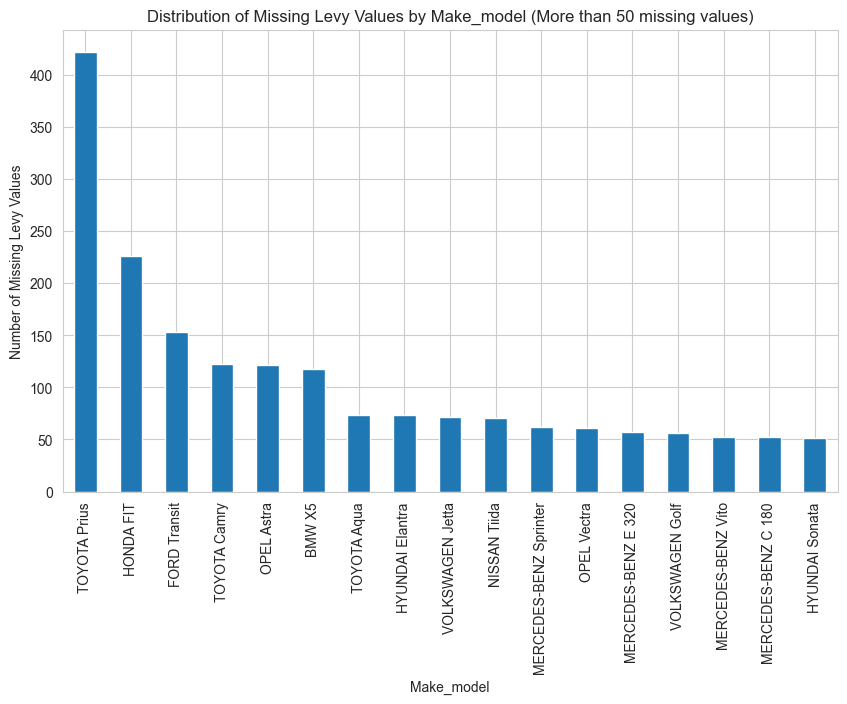

In [39]:
# I will have a look on missing and existing Levy values and check it on specific Make_models in the df.

threshold = 50
missing_levy_make_model = df[df['Levy'].isnull()]['Make_model'].value_counts()
filtered_missing_levy_make_model = missing_levy_make_model[missing_levy_make_model > threshold]

filtered_missing_levy_make_model.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Missing Levy Values by Make_model (More than 50 missing values)')
plt.xlabel('Make_model')
plt.ylabel('Number of Missing Levy Values')
plt.show()

In [40]:
# I pick the Make_model TOYOTA Prius which has the most missing Levy values.
# For TOYOTA_Prius in the dataframe there are 647 rows which have Levy values and 422 rows where the Levy values are missing.

existing_levy_TOYOTA_Prius = df[(df['Make_model'] == 'TOYOTA Prius') & (df['Levy'].notnull())]
existing_levy_TOYOTA_Prius.shape[0]

647

In [41]:
missing_levy_TOYOTA_Prius = df[(df['Make_model'] == 'TOYOTA Prius') & df['Levy'].isnull()]
missing_levy_TOYOTA_Prius.shape[0]

422

In [42]:
# I am filling the missing 422 Levy values in the dataframe calculating median values of the existing 647 same car Make_model categories.
# I chose median instead of mean because I have too many outliers in the dataframe.

def fill_missing_levy(group):
    median_levy = group['Levy'].median()
    group['Levy'] = group['Levy'].fillna(median_levy)
    return group

df = df.reset_index(drop=True)
df = df.groupby(['Make_model']).apply(fill_missing_levy)

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])

isnull



,isnull
Price,0
Levy,1318
Levy_percentage,5397
Make,0
Make_model,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0


In [43]:
# I filled the missing Levy values and then I am re-aligning Levy_percentage column according to the Levy and Price columns.

df['Levy_percentage'] = (df['Levy'] / df['Price']) * 100

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])

isnull

,isnull
Price,0
Levy,1318
Levy_percentage,1318
Make,0
Make_model,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0


In [44]:
# I still have missing Levy values which have not been filled in the data frame and I will dig into research to find the reason.
# I am filtering the missing and existing Levy values according to the Make_model feature.

no_levy_by_Make_model = df[df['Levy'].isnull()]['Make_model'].value_counts()
no_levy_by_Make_model

Make_model
MERCEDES-BENZ E 320       57
MITSUBISHI Pajero IO      47
BMW 525                   29
MERCEDES-BENZ E 200       28
MERCEDES-BENZ ML 320      27
                          ..
KIA Optima k5              1
LEXUS CT 200h 1.8          1
LEXUS CT 200h F SPORT      1
LEXUS CT 200h F sport      1
VOLKSWAGEN Transporter     1
Name: count, Length: 682, dtype: int64

In [45]:
existing_levy_by_Make_model = df[df['Levy'].notnull()]['Make_model'].value_counts()
existing_levy_by_Make_model

Make_model
TOYOTA Prius                          1069
HYUNDAI Sonata                        1067
TOYOTA Camry                           929
HYUNDAI Elantra                        910
MERCEDES-BENZ E 350                    534
                                      ... 
MITSUBISHI Pajero Mini 2010 წლიანი       1
MITSUBISHI Pajero Mini 2008 წლიანი       1
KIA Optima SXL                           1
MITSUBISHI Outlander სპორტ               1
MERCEDES-BENZ GLC 300 GLC coupe          1
Name: count, Length: 708, dtype: int64

In [46]:
# Below, I see the first four Make_model which could not be filled with a median Levy.
# I understand that this group has no Levy values at the beginning to calculate a median value and to fill in the missing data.
# E.g MERCEDES-BENZ E 320 Make_model counts a total of 57 rows and within this rows, no row has any Levy value.
# This characteristic group counts 1318 missing Levy values and I will fill missing values with the Levy value obtained from the same Make category of the Make_model.

mercedes_benz_e320 = df[df['Make_model'] == 'MERCEDES-BENZ E 320']
MITSUBISHI_Pajero_IO = df[df['Make_model'] == 'MITSUBISHI Pajero IO']
BMW_525 = df[df['Make_model'] == 'BMW 525']
mercedes_benz_200 = df[df['Make_model'] == 'MERCEDES-BENZ E 200']

print( '\n', 'mercedes_benz_e320:', len(mercedes_benz_e320), '\n', 'MITSUBISHI_Pajero_IO:', 
      len(MITSUBISHI_Pajero_IO), '\n', 'BMW_525:', len(BMW_525), '\n', 'mercedes_benz_200:', len(mercedes_benz_200))


 mercedes_benz_e320: 57 
 MITSUBISHI_Pajero_IO: 47 
 BMW_525: 29 
 mercedes_benz_200: 28


In [47]:
# I want to calculate the "Levy_percentage" median inside all "Make" features and implement the calculated percentage
# to the missing "Levy" and "Levy_percentage" features. 

median_levy_percentage_by_make = df.groupby('Make')['Levy_percentage'].median()

df['Levy_percentage'] = df.apply(
    lambda row: median_levy_percentage_by_make[row['Make']] if pd.isnull(row['Levy_percentage']) else row['Levy_percentage'],
    axis=1
)

df['Levy'] = df.apply(
    lambda row: (row['Levy_percentage'] * row['Price']) / 100 if pd.isnull(row['Levy']) else row['Levy'],
    axis=1
)

In [48]:
# Let's verify. Now MERCEDES-BENZ E 320 Make_models have a Levy_percentage value calculated by MERCEDES-BENZ Make.
# Every missing Levy values are filled by multiplying the Levy_percentage with the Price.

mercedes_e320 = df[df['Make_model'] == 'MERCEDES-BENZ E 320']
mercedes_e320.head()

Price    Levy  Levy_percentage           Make  \
Make_model                                                                
MERCEDES-BENZ E 320 97    15053 1921.02            12.76  MERCEDES-BENZ   
                    460   12544 1600.83            12.76  MERCEDES-BENZ   
                    725    7840 1000.52            12.76  MERCEDES-BENZ   
                    1447   9408 1200.62            12.76  MERCEDES-BENZ   
                    2316   7840 1000.52            12.76  MERCEDES-BENZ   

                                   Make_model  Prod_year Category  \
Make_model                                                          
MERCEDES-BENZ E 320 97    MERCEDES-BENZ E 320       2004    Sedan   
                    460   MERCEDES-BENZ E 320       2004    Sedan   
                    725   MERCEDES-BENZ E 320       1997    Sedan   
                    1447  MERCEDES-BENZ E 320       1998    Sedan   
                    2316  MERCEDES-BENZ E 320       1997    Sedan   

                         Leather_interior Fuel_type  Engine_volume  \
Make_model                                                           
MERCEDES-BENZ E 320 97                Yes    Petrol           3.20   
                    460               Yes    Petrol           3.20   
                    725               Yes       CNG           3.20   
                    1447              Yes       CNG           3.20   
                    2316              Yes       LPG           3.20   

                          Mileage_km  Cylinders Gearbox_type Drive_wheels  \
Make_model                                                                  
MERCEDES-BENZ E 320 97        214000       6.00    Tiptronic         Rear   
                    460       205500       6.00    Tiptronic         Rear   
                    725       111111       6.00    Automatic         Rear   
                    1447      230000       6.00    Automatic         Rear   
                    2316      170000       6.00       Manual         Rear   

                          Doors             Wheel   Color  Airbags  
Make_model                                                          
MERCEDES-BENZ E 320 97        4        Left wheel    Grey        8  
                    460       4  Right-hand drive  Silver        8  
                    725       4        Left wheel   Black        6  
                    1447      4        Left wheel   Black        6  
                    2316      4        Left wheel   Green        4

In [49]:
# I don't have any missing values left in my data frame.

isnull = pd.DataFrame(df.isnull().sum(), columns = ['isnull'])

isnull

,isnull
Price,0
Levy,0
Levy_percentage,0
Make,0
Make_model,0
Prod_year,0
Category,0
Leather_interior,0
Fuel_type,0
Engine_volume,0


In [50]:
# I calculate and replace the Age column with Prod_year column.
# The age calculation is dynamic. In every new year the age will increase.

df['Prod_year'] = pd.to_datetime(df['Prod_year'], format='%Y')

current_year = dt.datetime.now().year

df['Age'] = current_year - df['Prod_year'].dt.year

df = df.drop('Prod_year', axis=1)
df = df[['Price', 'Levy', 'Levy_percentage','Make',  'Make_model', 'Age', 'Category', 'Leather_interior',
         'Fuel_type', 'Engine_volume', 'Mileage_km', 'Cylinders', 'Gearbox_type', 'Drive_wheels', 'Doors', 'Wheel',
         'Color', 'Airbags']]

df.head(3)


Price    Levy  Levy_percentage  Make Make_model  Age  \
Make_model                                                              
AUDI 100   4121  25089 1292.00             5.15  AUDI   AUDI 100    7   
           7819    549  915.00           166.67  AUDI   AUDI 100    9   
AUDI 50    167    1300  165.54            12.73  AUDI    AUDI 50    5   

                Category Leather_interior Fuel_type  Engine_volume  \
Make_model                                                           
AUDI 100   4121     Jeep              Yes    Petrol           3.00   
           7819     Jeep              Yes    Petrol           3.00   
AUDI 50    167     Coupe              Yes    Petrol           0.50   

                 Mileage_km  Cylinders Gearbox_type Drive_wheels  Doors  \
Make_model                                                                
AUDI 100   4121       70782       6.00    Automatic          4x4      4   
           7819      143392       6.00    Automatic          4x4      4   
AUDI 50    167         4000       1.00    Tiptronic         Rear      5   

                            Wheel  Color  Airbags  
Make_model                                         
AUDI 100   4121        Left wheel  Black       12  
           7819        Left wheel  Black       12  
AUDI 50    167   Right-hand drive   Blue        0

In [51]:
# I get the data frame info to see the latest situation.

df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 18418 entries, ('AUDI 100', 4121) to ('VOLKSWAGEN Vento', 17948)
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18418 non-null  int64  
 1   Levy              18418 non-null  float64
 2   Levy_percentage   18418 non-null  float64
 3   Make              18418 non-null  object 
 4   Make_model        18418 non-null  object 
 5   Age               18418 non-null  int32  
 6   Category          18418 non-null  object 
 7   Leather_interior  18418 non-null  object 
 8   Fuel_type         18418 non-null  object 
 9   Engine_volume     18418 non-null  float64
 10  Mileage_km        18418 non-null  int64  
 11  Cylinders         18418 non-null  float64
 12  Gearbox_type      18418 non-null  object 
 13  Drive_wheels      18418 non-null  object 
 14  Doors             18418 non-null  int64  
 15  Wheel             18418 non-null  object 
 16  C

In [52]:
# I observe the Category feature.

df['Category'].unique()

array(['Jeep', 'Coupe', 'Hatchback', 'Sedan', 'Universal', 'Cabriolet',
       'Limousine', 'Pickup', 'Minivan', 'Goods wagon', 'Microbus'],
      dtype=object)

In [53]:
# It seems that there are 1390 unique Make_models appearing in the data frame. For 23 Car Brands it is quite too much.

df['Make_model'].value_counts()

Make_model
TOYOTA Prius                            1069
HYUNDAI Sonata                          1067
TOYOTA Camry                             929
HYUNDAI Elantra                          910
MERCEDES-BENZ E 350                      534
                                        ... 
FORD Explorer XLT                          1
FORD Explorer Turbo japan                  1
MERCEDES-BENZ GLE 400 A M G                1
MERCEDES-BENZ GLE 400 Coupe, AMG Kit       1
MERCEDES-BENZ C 270                        1
Name: count, Length: 1390, dtype: int64

##### It is clearly seen that some rows which have unique Make_model but having so small number of occurence due to less redundancy. 
If we remove Make_models which have less than 2 occurence it will decrease our rows around 4.5% and it will decrease the unique Make_model feature count from 1390 to 829.

If we remove Make_models which have less than 3 occurence it will decrease our rows around 6.1% and it will decrease the unique Make_model feature count from 1390 to 977.

It is reasonable to filter the car Make_models which have less than 2 rows for each unique Make_model. Less than 5% of data loss is statistically negligible.

In [54]:
# The Make_models which have less than 2 occurences

Make_model_counts = df.Make_model.value_counts()
filtered_Make_model_counts = Make_model_counts[Make_model_counts < 2]

print('Sum of Make_model rows which have less than 2 occurences: ', filtered_Make_model_counts.sum())

print(filtered_Make_model_counts)


Sum of Make_model rows which have less than 2 occurences:  829
Make_model
NISSAN Primera                          1
SUBARU Forester stb                     1
BMW 740 i                               1
SUBARU Impreza G4                       1
SUBARU Impreza Sport                    1
                                       ..
FORD Explorer XLT                       1
FORD Explorer Turbo japan               1
MERCEDES-BENZ GLE 400 A M G             1
MERCEDES-BENZ GLE 400 Coupe, AMG Kit    1
MERCEDES-BENZ C 270                     1
Name: count, Length: 829, dtype: int64


In [55]:
# The Make_models which have less than 3 occurences

Make_model_counts = df.Make_model.value_counts()
filtered_Make_model_counts = Make_model_counts[Make_model_counts < 3]

print('Sum of Make_model rows which have less than 3 occurences: ', filtered_Make_model_counts.sum())

print(filtered_Make_model_counts)


Sum of Make_model rows which have less than 3 occurences:  1125
Make_model
KIA Optima hybrid                       2
LEXUS RX 400 HYBRID                     2
VOLKSWAGEN Jetta სპორტ                  2
VOLKSWAGEN Passat se                    2
LEXUS IS 300                            2
                                       ..
FORD Explorer XLT                       1
FORD Explorer Turbo japan               1
MERCEDES-BENZ GLE 400 A M G             1
MERCEDES-BENZ GLE 400 Coupe, AMG Kit    1
MERCEDES-BENZ C 270                     1
Name: count, Length: 977, dtype: int64


In [56]:
# I remove the Make_models which have less than 2  occurences in the data frame

unfiltered_Make_model_counts = Make_model_counts[Make_model_counts > 2]

mask = df['Make_model'].isin(unfiltered_Make_model_counts.index)
df_filtered = df[mask]

df = df_filtered

print(df['Make_model'].value_counts())

df.shape


Make_model
TOYOTA Prius                  1069
HYUNDAI Sonata                1067
TOYOTA Camry                   929
HYUNDAI Elantra                910
MERCEDES-BENZ E 350            534
                              ... 
TOYOTA Camry LE                  3
MITSUBISHI Montero               3
MITSUBISHI Outlander SPORT       3
FIAT 500L                        3
HONDA Inspire                    3
Name: count, Length: 413, dtype: int64


(17293, 18)

In [57]:
df['Make_model'].value_counts()

Make_model
TOYOTA Prius                  1069
HYUNDAI Sonata                1067
TOYOTA Camry                   929
HYUNDAI Elantra                910
MERCEDES-BENZ E 350            534
                              ... 
TOYOTA Camry LE                  3
MITSUBISHI Montero               3
MITSUBISHI Outlander SPORT       3
FIAT 500L                        3
HONDA Inspire                    3
Name: count, Length: 413, dtype: int64

In [58]:
# Now we have 23 different Makes of cars which have at least 41 models in the data frame. 
# And within all these Makes, every Make_model has more than 2 occurences. This will help our database return steadier results.

brands = df['Make'].value_counts()

print('Brands:', '\n', brands)

brand_counts = brands.value_counts()

print('\nTotal Num. of Brands:', len(brands))

print('DataFrame Shape:', df.shape)


Brands: 
 Make
HYUNDAI          3671
TOYOTA           3466
MERCEDES-BENZ    1812
FORD             1019
CHEVROLET        1009
HONDA             908
LEXUS             898
BMW               897
NISSAN            591
VOLKSWAGEN        509
SSANGYONG         438
KIA               396
OPEL              357
MITSUBISHI        255
SUBARU            246
AUDI              223
MAZDA             144
JEEP              131
DAEWOO             90
DODGE              82
FIAT               55
SUZUKI             55
PORSCHE            41
Name: count, dtype: int64

Total Num. of Brands: 23
DataFrame Shape: (17293, 18)


# 📊 Exploratory Data Analysis (EDA)

I created some graphics to examine the data and it seems that due to the high range and the extreme values we can not see the visual outputs.

In [59]:
df.hvplot.hist("Price")

:Histogram   [Price]   (Price_count)

## Evaluation of "Price" column (Our Target Feature)

In [60]:
df.Price.value_counts(dropna=False)

Price
470      255
15681    246
392      231
314      222
12544    209
        ... 
29163      1
24004      1
32979      1
40183      1
9361       1
Name: count, Length: 2243, dtype: int64

In [61]:
# i have no missing Price values.

df.Price.isnull().sum()

0

In [62]:
# I check the range of the Price feature and saw that the standard deviation (std) is quite high.

price_range = df['Price'].describe()
price_range

count      17293.00
mean       18209.18
std       200638.30
min            1.00
25%         5018.00
50%        13000.00
75%        21953.00
max     26307500.00
Name: Price, dtype: float64

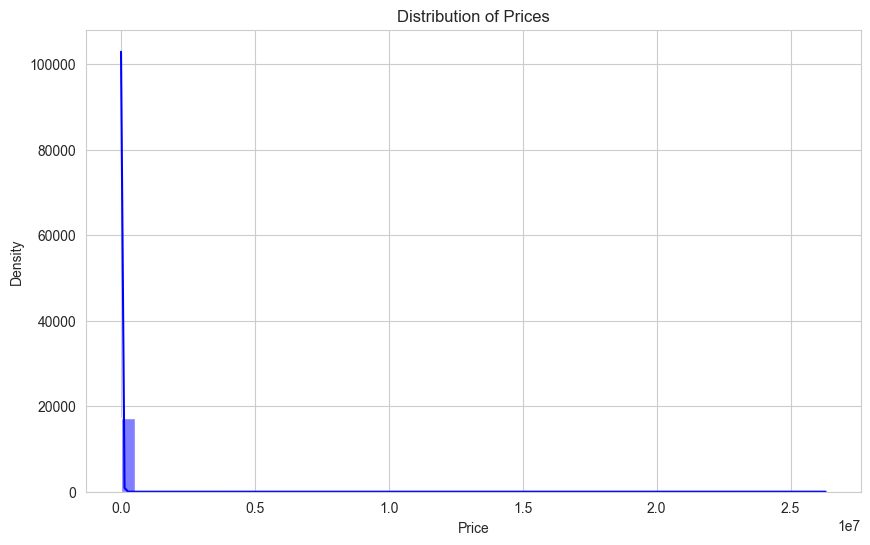

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


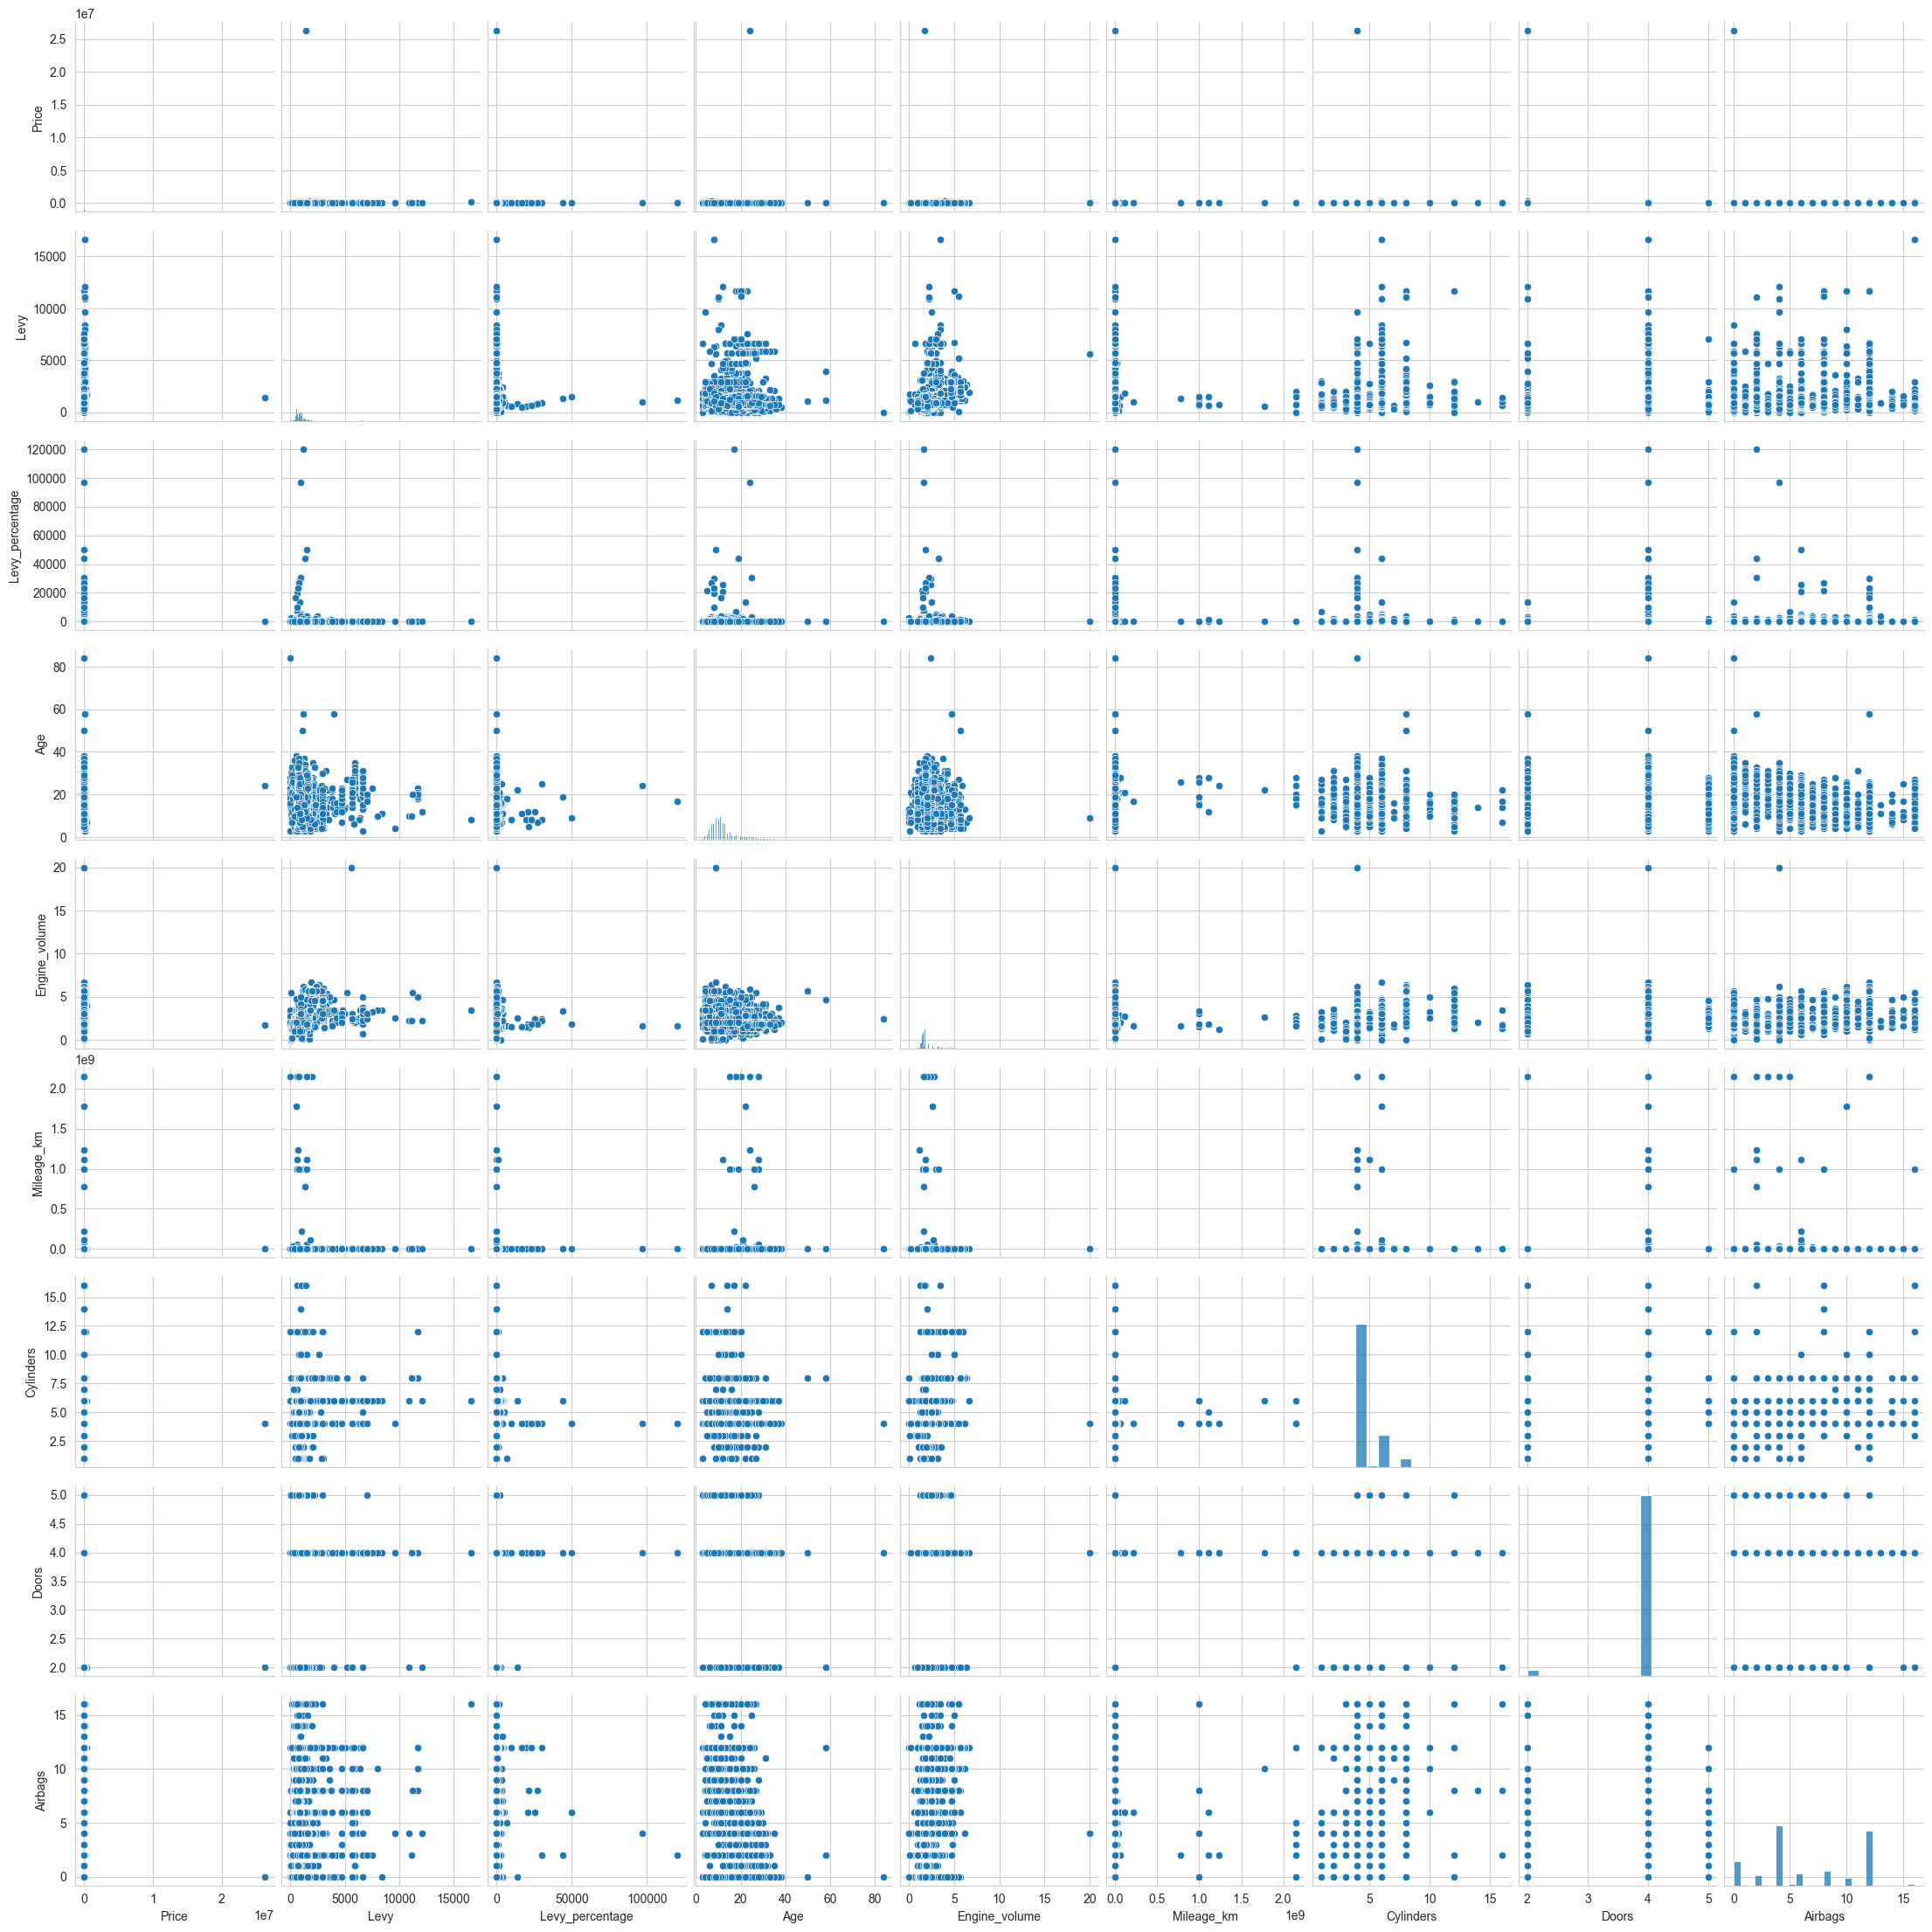

In [64]:
# I observe that it is difficult to tell about clear linear relationships in the pairplot.
# This may require more advanced techniques or feature engineering in the following steps.

sns.pairplot(df)

##### The tables below show that there are extreme outliers in the Price feature and I will handle it in the data pre-processing step.

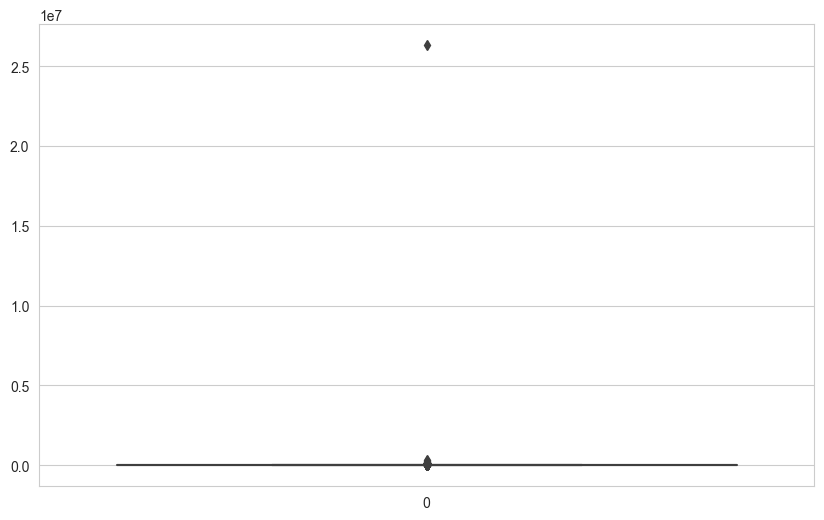

In [65]:
sns.boxplot(df.Price)
plt.show()

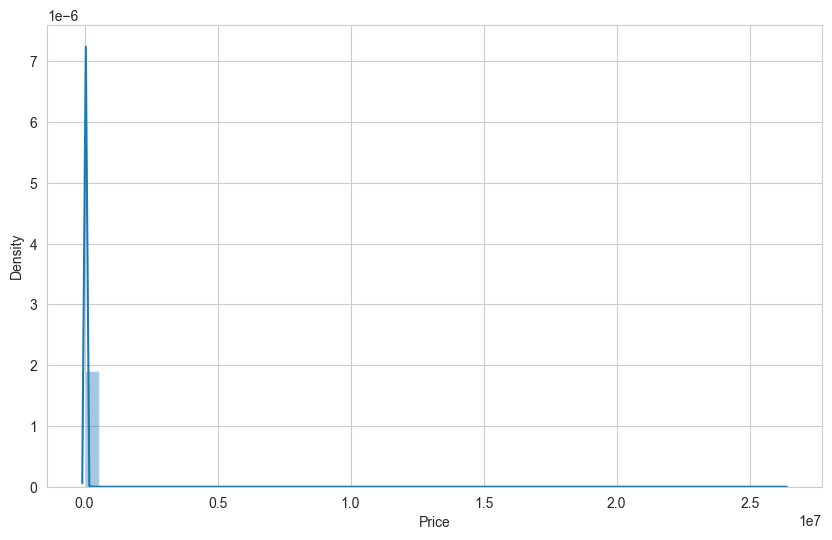

In [66]:
sns.distplot(df.Price)
plt.show()

In [67]:
# I got a highly positive skewness for the 'Price' column. It seems that there are likely some extreme high values in the 'Price'.

skew(df.Price)

130.09696907738186

In [68]:
# To reduce the impact of extreme values and make the distribution more symmetric I apply Log Transformation and Box-Cox Transformation method for stabilizing variance and reducing skewness.
# I see that our target feature Price is left skewed and close to 0.

df_copy = df.copy()

df_copy['Price'] = np.log1p(df_copy['Price'])

df_copy['Price'], _ = boxcox(df_copy['Price'] + 1)

transformed_skewness = skew(df_copy['Price'])

df_copy['Price_log'] = np.log1p(df_copy['Price'])

transformed_skewness = skew(df_copy['Price'])

transformed_skewness

-0.06035162542823947

In [69]:
# I will keep the log-transformed price in the data frame as a new feature until the Model Evaluation phase. 

df['Price_log'] = np.log1p(df['Price'])

print(df.columns)

Index(['Price', 'Levy', 'Levy_percentage', 'Make', 'Make_model', 'Age',
       'Category', 'Leather_interior', 'Fuel_type', 'Engine_volume',
       'Mileage_km', 'Cylinders', 'Gearbox_type', 'Drive_wheels', 'Doors',
       'Wheel', 'Color', 'Airbags', 'Price_log'],
      dtype='object')


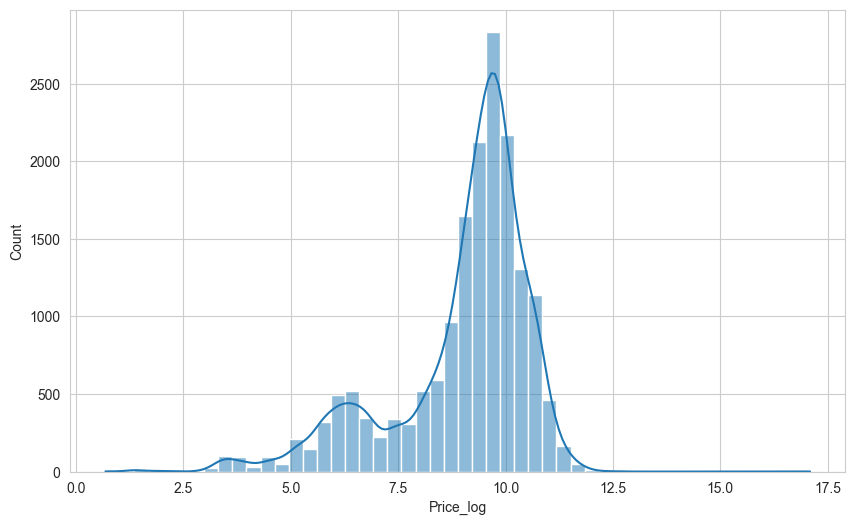

In [70]:
# Now I can obtain a distribution using Price_log feature derived from Price feature.

sns.histplot(df['Price_log'], bins=50, kde=True)
plt.show()

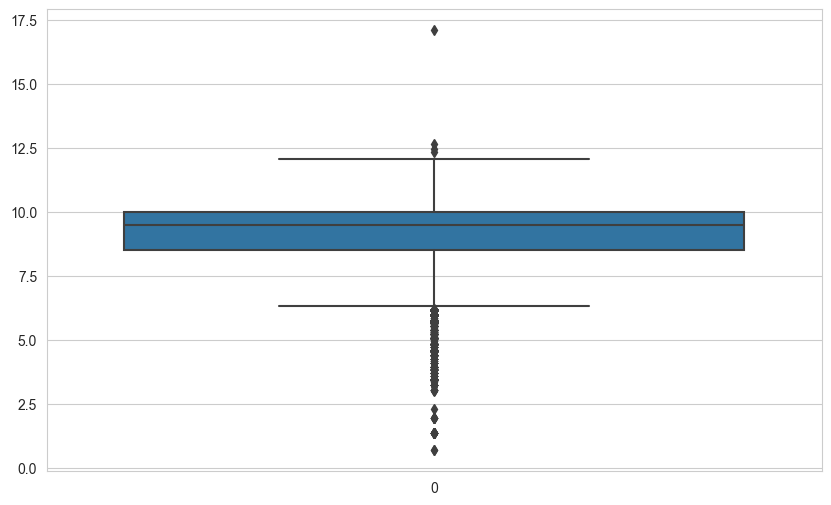

In [71]:
# The boxplot chart shows that the Price feature is negatively skewed.

sns.boxplot(df.Price_log)
plt.show()

In [72]:
# I am calculating the correlation matrix among all the columns of the dataframe.

df_numeric = df.select_dtypes(include ="number")
df_numeric.corr()

,Price,Levy,Levy_percentage,Age,Engine_volume,Mileage_km,Cylinders,Doors,Airbags,Price_log
Price,1.00,0.01,-0.01,-0.01,0.00,-0.00,0.00,-0.04,-0.02,0.10
Levy,0.01,1.00,0.01,0.24,0.43,0.00,0.37,-0.10,0.01,0.03
Levy_percentage,-0.01,0.01,1.00,0.03,0.00,-0.00,0.01,0.01,-0.00,-0.23
Age,-0.01,0.24,0.03,1.00,0.03,0.06,0.10,-0.18,-0.21,-0.13
Engine_volume,0.00,0.43,0.00,0.03,1.00,-0.01,0.78,-0.02,0.21,-0.04
Mileage_km,-0.00,0.00,-0.00,0.06,-0.01,1.00,0.00,-0.01,-0.01,-0.02
Cylinders,0.00,0.37,0.01,0.10,0.78,0.00,1.00,-0.03,0.16,-0.07
Doors,-0.04,-0.10,0.01,-0.18,-0.02,-0.01,-0.03,1.00,0.04,-0.01
Airbags,-0.02,0.01,-0.00,-0.21,0.21,-0.01,0.16,0.04,1.00,-0.12
Price_log,0.10,0.03,-0.23,-0.13,-0.04,-0.02,-0.07,-0.01,-0.12,1.00


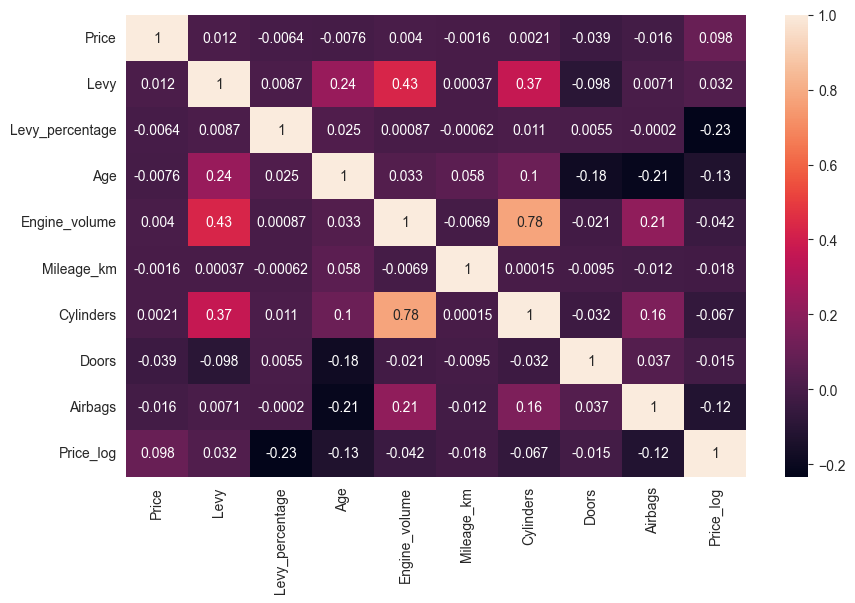

In [73]:
# I am visualising the correlation matrix by a heatmap. I will check it again after feature engineering.

sns.heatmap(df_numeric.corr(), annot =True)
plt.show()

In [74]:
df.shape

(17293, 19)

# Feature Engineering

In [75]:
# I am eliminating the outliers in the dataset. I will use the Price_log feature for this. I am using Tuckey Fences for this (John Tuckey).

from scipy import stats

for model in df.Make_model.unique():
    
    car_prices = df[df["Make_model"] == model]["Price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = stats.iqr(car_prices)
    
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR

    drop_index = df[(df["Make_model"] == model) & ((car_prices < lower_lim) | (car_prices > upper_lim))].index
    df.drop(index=drop_index, inplace=True)

In [76]:
# I am calculating the correlation matrix among all the columns of the dataframe. At first glance, Age and Engine_volume features seem having remarkable correlation on the Price feature.

df_numeric = df.select_dtypes(include ="number")
df_numeric.corr()

,Price,Levy,Levy_percentage,Age,Engine_volume,Mileage_km,Cylinders,Doors,Airbags,Price_log
Price,1.00,0.06,-0.08,-0.27,0.10,-0.01,0.05,0.02,-0.09,0.73
Levy,0.06,1.00,0.01,0.26,0.44,0.00,0.38,-0.10,-0.00,0.02
Levy_percentage,-0.08,0.01,1.00,0.02,0.01,-0.00,0.02,0.01,0.00,-0.26
Age,-0.27,0.26,0.02,1.00,0.03,0.05,0.11,-0.19,-0.21,-0.09
Engine_volume,0.10,0.44,0.01,0.03,1.00,-0.01,0.78,-0.02,0.20,-0.06
Mileage_km,-0.01,0.00,-0.00,0.05,-0.01,1.00,-0.00,-0.01,-0.01,-0.01
Cylinders,0.05,0.38,0.02,0.11,0.78,-0.00,1.00,-0.03,0.15,-0.08
Doors,0.02,-0.10,0.01,-0.19,-0.02,-0.01,-0.03,1.00,0.04,-0.02
Airbags,-0.09,-0.00,0.00,-0.21,0.20,-0.01,0.15,0.04,1.00,-0.14
Price_log,0.73,0.02,-0.26,-0.09,-0.06,-0.01,-0.08,-0.02,-0.14,1.00


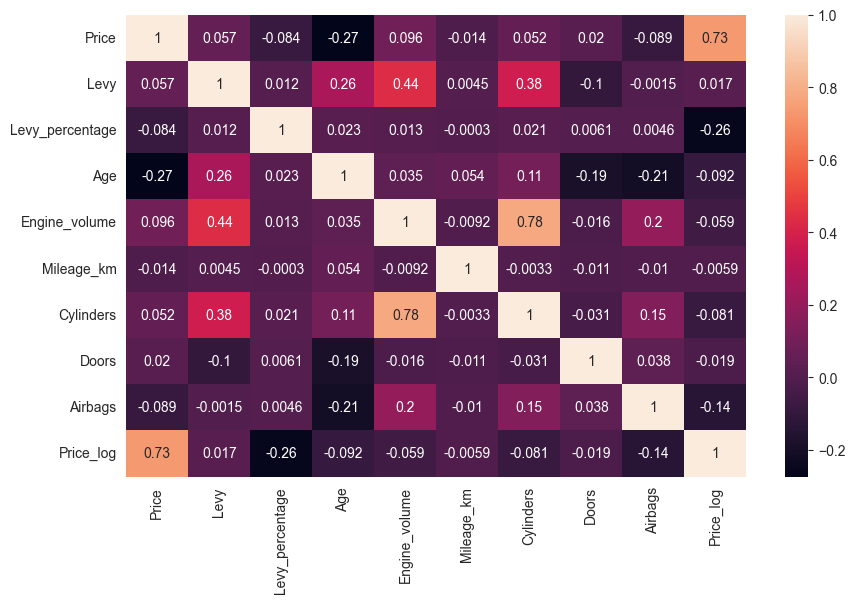

In [77]:
# I am visualising the correlation matrix by a heatmap. I see that Age and Engine_volume have remarkable correlation with the Price feature compared to other features.

sns.heatmap(df_numeric.corr(), annot =True)
plt.show()

In [78]:
df.shape

(16576, 19)

## DATA PREPROCESSING

### To prepare my dataframe for Machine Learning models, I need to find the columns of object type then I will perform preprocessing on these columns by one-hot encoding or label encoding.

In [79]:
# I print the information of the columns that have object data type (likely string or categorical data) to use in preprocessing.

for col in df.select_dtypes(include='object').columns:
    print(f"{col:<20}:", df[col].nunique())


Make                : 23
Make_model          : 413
Category            : 11
Leather_interior    : 2
Fuel_type           : 7
Gearbox_type        : 4
Drive_wheels        : 3
Wheel               : 2
Color               : 16


In [80]:
# To convert categorical object type data into a format that machine learning algorithms can handle,
# I am performing various preprocessing steps for the columns that have object data type.
# I implement one-hot encoding and label encoding methods to get the data prepared for the model.

df = pd.get_dummies(df, columns=['Make_model'], prefix='Make_model')

df = pd.get_dummies(df, columns=['Make'], prefix='Make')

df = pd.get_dummies(df, columns=['Category'], prefix='Category')

label_encoder = LabelEncoder()
df['Leather_interior_encoded'] = label_encoder.fit_transform(df['Leather_interior'])

df = df.drop('Leather_interior', axis=1)

df = pd.get_dummies(df, columns=['Fuel_type'], prefix='Fuel_type')

df = pd.get_dummies(df, columns=['Gearbox_type'], prefix='Gearbox_type')

df = pd.get_dummies(df, columns=['Drive_wheels'], prefix='Drive_wheels')

label_encoder = LabelEncoder()
df['Wheel_encoded'] = label_encoder.fit_transform(df['Wheel'])

df = df.drop('Wheel', axis=1)

df = pd.get_dummies(df, columns=['Color'], prefix='Color')


In [81]:
df.head()

Price   Levy  Levy_percentage  Age  Engine_volume  \
Make_model                                                            
AUDI A3    4576   19444 707.00             3.64   12           2.00   
           8855    1568 642.00            40.94   11           2.00   
           10653  16621 642.00             3.86   18           2.00   
           11144   2587 642.00            24.82   11           2.00   
           12891   6743 328.00             4.86    7           1.40   

                  Mileage_km  Cylinders  Doors  Airbags  Price_log  \
Make_model                                                           
AUDI A3    4576       145600       4.00      4        8       9.88   
           8855       167398       4.00      4       12       7.36   
           10653       22200       4.00      4        8       9.72   
           11144      174966       4.00      4       12       7.86   
           12891      104805       4.00      4        0       8.82   

                  Make_model_AUDI A3  Make_model_AUDI A4  Make_model_AUDI A5  \
Make_model                                                                     
AUDI A3    4576                 True               False               False   
           8855                 True               False               False   
           10653                True               False               False   
           11144                True               False               False   
           12891                True               False               False   

                  Make_model_AUDI A6  Make_model_AUDI A7  Make_model_AUDI A8  \
Make_model                                                                     
AUDI A3    4576                False               False               False   
           8855                False               False               False   
           10653               False               False               False   
           11144               False               False               False   
           12891               False               False               False   

                  Make_model_AUDI Allroad  Make_model_AUDI Q3  \
Make_model                                                      
AUDI A3    4576                     False               False   
           8855                     False               False   
           10653                    False               False   
           11144                    False               False   
           12891                    False               False   

                  Make_model_AUDI Q5  Make_model_AUDI Q7  Make_model_BMW 225  \
Make_model                                                                     
AUDI A3    4576                False               False               False   
           8855                False               False               False   
           10653               False               False               False   
           11144               False               False               False   
           12891               False               False               False   

                  Make_model_BMW 316  Make_model_BMW 318  Make_model_BMW 320  \
Make_model                                                                     
AUDI A3    4576                False               False               False   
           8855                False               False               False   
           10653               False               False               False   
           11144               False               False               False   
           12891               False               False               False   

                  Make_model_BMW 325  Make_model_BMW 328  \
Make_model                                                 
AUDI A3    4576                False               False   
           8855                False               False   
           10653               False               False   
           11144             

In [82]:
df.shape

(16576, 489)

## Model Training

### X and y tables

In [83]:
X = df.drop(['Price', 'Price_log', 'Levy_percentage'], axis=1)
y = df['Price']

### Train | Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12432, 486)
X_test shape: (4144, 486)
y_train shape: (12432,)
y_test shape: (4144,)


## Preparation of the Data for Linear Regression

In [85]:
# This function evaluates the performance of the Linear Regression Machine Learning model on both training and testing datasets.
# It takes the following inputs:
#   - model: The trained machine learning model
#   - X_train, y_train: The feature matrix and target values of the training dataset
#   - X_test, y_test: The feature matrix and target values of the testing dataset

def train_val_lr(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
# The predictive performance of the Linear Regression model is 52% for training, 46% for test data.

train_val_lr(lr, X_train, y_train, X_test, y_test)

,train,test
R2,0.52,0.46
mae,7214.73,7493.28
mse,108896670.25,126243448.50
rmse,10435.36,11235.81


## Cross-validation of the Linear Regression

In [88]:
# I implement cross-validation to evaluate the Linear Regression model with 10 folds.

model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [89]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.65,0.03,0.52,-7203.71,-113335196.91,-10645.90
1,0.72,0.03,0.45,-7841.32,-132454950.07,-11508.91
2,0.62,0.10,0.44,-7529.04,-120065702.07,-10957.45
3,0.59,0.03,0.42,-7701.95,-131658588.18,-11474.26
4,1.08,0.03,0.51,-7377.50,-119121903.79,-10914.30
5,0.56,0.12,0.40,-7452.58,-119876480.04,-10948.81
6,0.65,0.08,0.44,-7295.43,-118030812.31,-10864.20
7,0.67,0.08,0.41,-7942.63,-140510433.55,-11853.71
8,0.62,0.03,0.41,-7606.10,-113910126.87,-10672.87
9,0.67,0.03,0.45,-7643.28,-130602991.38,-11428.17


####  Despite low predictive performance, the consistency in the overall performance metrics suggests a stable and reliable predictive capability.

In [90]:
# Average performance of the calculated cross-validation folds.

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.45
test_neg_mean_absolute_error            -7559.35
test_neg_mean_squared_error        -123956718.52
test_neg_root_mean_squared_error       -11126.86
dtype: float64

## Random Forest

## Preparation of the Data for Random Forest

In [91]:
# This function evaluates the performance of the Random Forest Regression model on both training and testing datasets.
# It takes the following inputs:
#   - model: The trained Random Forest Regression model
#   - X_train, y_train: The feature matrix and target values of the training dataset
#   - X_test, y_test: The feature matrix and target values of the testing dataset
# It calculates key regression metrics such as R-squared, Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.
# The results are organized into a pandas DataFrame for easy comparison between training and testing performance.
# A Random Forest Regressor (RFR) is defined with 100 estimators and a fixed random state. The model is then trained on the training data.


def train_val_rf(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        },
    }

    return pd.DataFrame(scores)

RFR = RandomForestRegressor(n_estimators=100, random_state=42)

RFR.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [92]:
# The gap between train and test results is a reason to suspect of overfitting.
# I will evaluate it according to the analysis below (Top fatures, GridSearchCV hyperparameter tuning).

train_val_rf(RFR, X_train, y_train, X_test, y_test)

,train,test
R2,0.95,0.75
mae,1466.34,3699.45
mse,10845459.64,57096595.11
rmse,3293.24,7556.23


### Observing the Top Features

In [93]:
# The top 10 features to provide insights into which features have the most impact on the model's predictions.

feature_importances = RFR.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top Features:")
print(feature_importance_df.head(10))


Top Features:
                      Feature  Importance
1                         Age        0.18
6                     Airbags        0.10
3                  Mileage_km        0.08
2               Engine_volume        0.07
456          Fuel_type_Diesel        0.07
0                        Levy        0.06
464    Gearbox_type_Tiptronic        0.05
447             Category_Jeep        0.03
112    Make_model_HONDA Civic        0.02
92   Make_model_FORD Explorer        0.02


##  Grid Search

In [94]:
# I perform hyperparameter tuning for my Random Forest Regressor using GridSearchCV.

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

RFR = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=RFR, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
# Based on the performance on the negative mean squared error in a 5-fold cross-validation,
# I create a new instance of RandomForestRegressor with the best hyperparameters.

best_rf_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100
)

# I am training the model on the training data
best_rf_model.fit(X_train, y_train)


RandomForestRegressor()

In [97]:
# I evaluate the performance of the best Random Forest Regressor model on the test dataset.
# This helps me assess how well the trained Random Forest Regressor adapts to new, unseen data,
# and also helps me to understand the model's predictive accuracy and reliability.

y_pred = best_rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 57345722.49689709
Root Mean Squared Error: 7572.69585398074
R2 Score: 0.7538859470972273


### Analysis:

The latest R² score on the test set is consistent with the previous test R² score. Both indicate that approximately 75% of the variance in the target variable is explained by the model on unseen data.

The latest RMSE on the test set is close to the previous test RMSE, suggesting similar average prediction errors.

The latest MSE on the test set is comparable to the previous test MSE.

In [98]:
# I implement cross-validation to evaluate the Random Forest Regressor model with 10 folds.

model = RandomForestRegressor()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [99]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,11.08,0.07,0.76,-3580.49,-57009909.47,-7550.49
1,11.58,0.08,0.79,-3678.86,-50404539.13,-7099.62
2,10.56,0.06,0.79,-3590.76,-44770362.95,-6691.07
3,9.62,0.04,0.71,-3692.45,-65440054.85,-8089.50
4,10.19,0.05,0.81,-3517.91,-47546692.10,-6895.41
5,9.88,0.04,0.72,-3733.35,-56568566.68,-7521.21
6,9.81,0.06,0.75,-3763.72,-53049589.29,-7283.51
7,9.78,0.04,0.67,-3875.92,-78979135.64,-8887.02
8,9.44,0.05,0.74,-3720.74,-49610769.35,-7043.49
9,10.21,0.06,0.79,-3692.58,-50512951.90,-7107.25


In [100]:
# Average performance of the calculated cross-validation folds.

pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.75
test_neg_mean_absolute_error           -3684.68
test_neg_mean_squared_error        -55389257.14
test_neg_root_mean_squared_error       -7416.86
dtype: float64

Below, I see that the Random Forest model seems to perform reasonably well on the test set.

The R2 score suggests that a significant portion of the variance in the target variable is captured by the model.

In [101]:
# I perform feature scaling using Min-Max scaling.
# To ensure that both the training and test data are scaled consistently and the Random Forest Regressor is trained on the scaled features I run the code below.

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# I continue with Random Forest Regressor training.

RFR = RandomForestRegressor(n_estimators=150, random_state=42)

RFR.fit(X_train_scaled, y_train)

y_test_pred = RFR.predict(X_test_scaled)

# I print the predicted values and the evaluation metrics
print("Predicted Values on Test Set:")
print(y_test_pred)

mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R2 Score: {r2}')


Predicted Values on Test Set:
[1872.58666667 8311.92733333  808.87733333 ... 9231.78666667 5772.19161844
 9373.54666667]
Mean Squared Error: 57661515.65015802
Root Mean Squared Error: 7593.518002227823
R2 Score: 0.7525306388119023


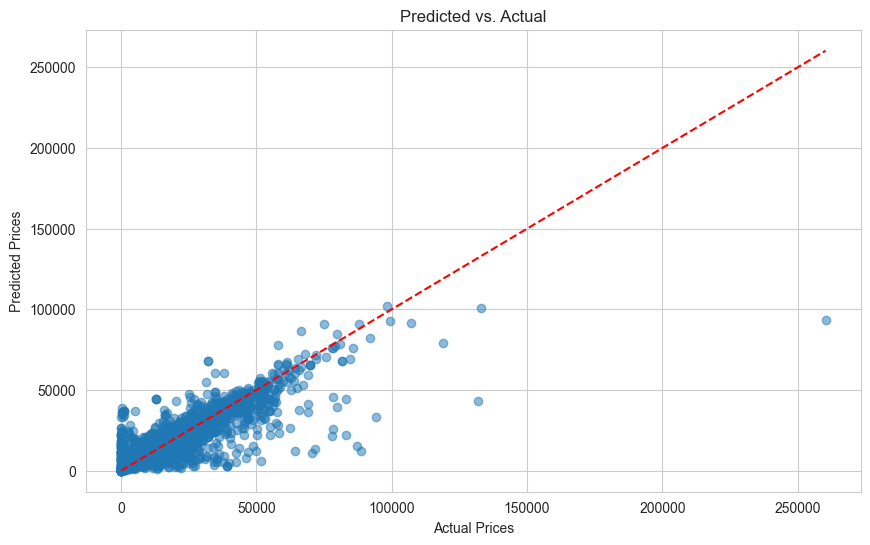

In [102]:
# I visualised the output to see the actual and predicted Price distribution.


def scatter_plot_predictions(y_true, y_pred, title="Predicted vs. Actual"):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], linestyle='--', color='red')
    plt.title(title)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.show()

y_test_true = y_test
y_test_pred = RFR.predict(X_test_scaled)

scatter_plot_predictions(y_test_true, y_test_pred)


---

## Comparison of the Models

### Comparison of Metrics

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


y_lr_pred = lr.predict(X_test)

y_rf_pred = RFR.predict(X_test_scaled)

lr_metrics = {
    'R2': r2_score(y_test, y_lr_pred),
    'MAE': mean_absolute_error(y_test, y_lr_pred),
    'MSE': mean_squared_error(y_test, y_lr_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_lr_pred))
}

rf_metrics = {
    'R2': r2_score(y_test, y_rf_pred),
    'MAE': mean_absolute_error(y_test, y_rf_pred),
    'MSE': mean_squared_error(y_test, y_rf_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_rf_pred))
}

print("Linear Regression Metrics:")
print(lr_metrics)

print("\nRandom Forest Metrics:")
print(rf_metrics)


Linear Regression Metrics:
{'R2': 0.45819347265961474, 'MAE': 7493.283947901078, 'MSE': 126243448.50451726, 'RMSE': 11235.810985617249}

Random Forest Metrics:
{'R2': 0.7525306388119023, 'MAE': 3718.0017290822248, 'MSE': 57661515.65015802, 'RMSE': 7593.518002227823}


### Scatter Plot Comparison

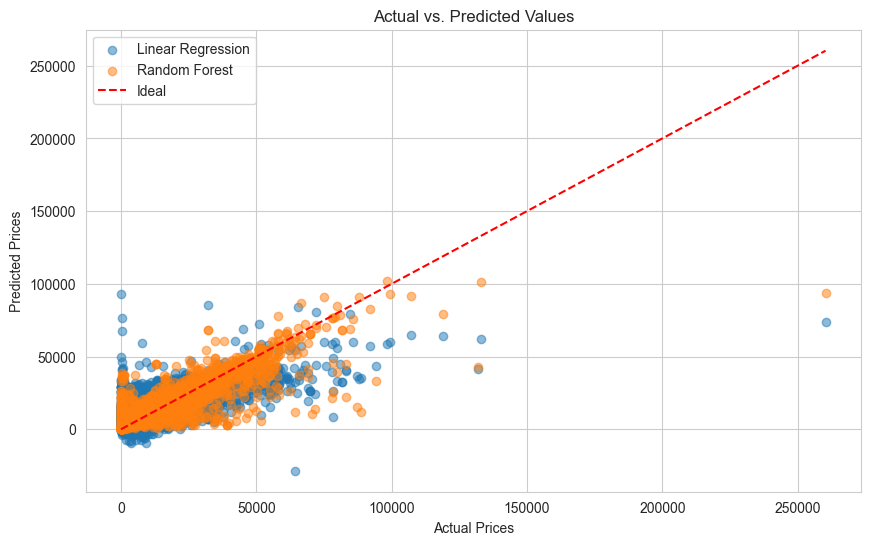

In [104]:
# Comparison of Linear Regression and the Random Forest models on scatter plot chart

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_lr_pred, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_rf_pred, label='Random Forest', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Ideal')
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()


### Feature importance comparison

In [105]:
feature_importances_lr = np.abs(lr.coef_)
feature_importances_rf = RFR.feature_importances_

feature_names = X_train.columns

feature_importance_df_lr = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_lr})
feature_importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})

feature_importance_df_lr = feature_importance_df_lr.sort_values(by='Importance', ascending=False)
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)

print("Top Features - Linear Regression:")
print(feature_importance_df_lr.head(10))

print("\nTop Features - Random Forest:")
print(feature_importance_df_rf.head(10))


Top Features - Linear Regression:
                                   Feature  Importance
42                       Make_model_BMW M6    69671.17
270      Make_model_MERCEDES-BENZ S 63 AMG    69532.74
247      Make_model_MERCEDES-BENZ G 55 AMG    54464.50
275  Make_model_MERCEDES-BENZ Sprinter 516    53724.57
381         Make_model_TOYOTA Land Cruiser    49817.30
254       Make_model_MERCEDES-BENZ GLC 300    45064.70
93                    Make_model_FORD F150    43448.65
243         Make_model_MERCEDES-BENZ E 400    41381.21
258        Make_model_MERCEDES-BENZ ML 250    40134.32
48                     Make_model_BMW X5 M    38423.47

Top Features - Random Forest:
                      Feature  Importance
1                         Age        0.19
6                     Airbags        0.10
3                  Mileage_km        0.08
456          Fuel_type_Diesel        0.08
2               Engine_volume        0.08
0                        Levy        0.06
464    Gearbox_type_Tiptronic       

---

# 📝 FINAL REPORT

#### You can find the final report in this file.

# 👇

<a href=Mehmet_Avci_ML_Rapport_Final.ipynb>Mehmet_avci_ML_Rapport_Final.ipynb</a>